In [1]:
import sys
import zipfile
import os
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import random
import os
import matplotlib.pyplot as plt

print(sys.executable)

c:\Users\marti\anaconda3\python.exe


In [2]:
%pip install kaggle
!kaggle datasets download -d shuyangli94/food-com-recipes-and-user-interactions

Note: you may need to restart the kernel to use updated packages.
Dataset URL: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions
License(s): copyright-authors
food-com-recipes-and-user-interactions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Define the path to your zip file and where you want to extract it
zip_file_path = "food-com-recipes-and-user-interactions.zip."
output_directory = "./Dataset_unzipped"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(output_directory)

print("Unzipping complete!")

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

Unzipping complete!


In [ ]:
# Chemin complet vers le fichier RAW_recipes.csv
raw_recipes_path = os.path.join(output_directory, "RAW_recipes.csv")

# Lire le fichier CSV
RAW_recipe = pd.read_csv(raw_recipes_path)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(RAW_recipe.head().to_html()))

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

In [ ]:
# Chemin complet vers le fichier RAW_interactions.csv
raw_interactions_path = os.path.join(output_directory, "RAW_interactions.csv")

# Lire le fichier CSV
RAW_interactions = pd.read_csv(raw_interactions_path)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(RAW_interactions.head().to_html()))

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [ ]:
# Chemin complet vers le fichier PP_recipes.csv
pp_recipes_path = os.path.join(output_directory, "PP_recipes.csv")

# Lire le fichier CSV
PP_recipes = pd.read_csv(pp_recipes_path)

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(PP_recipes.head().to_html()))

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 2839, 1781, 40481]","[[2911, 1019, 249, 6878], [1353], [6953], [15341, 3261], [2056, 857, 643, 1631, 20480]]","[40480, 40482, 21662, 481, 6878, 500, 246, 1614, 1911, 10757, 240, 674, 9933, 8400, 40478, 40482, 1082, 589, 16126, 500, 481, 6878, 2839, 1781, 5024, 240, 488, 13770, 485, 23667, 40478, 40482, 1233, 481, 4165, 562, 481, 5186, 1454, 6878, 7213, 40478, 40482, 669, 481, 4165, 10230, 485, 256, 1178, 2107, 256, 240, 1233, 246, 17764, 562, 7648, 1571, 40478, 40482, 861, 7648, 1571, 240, 25690, 6878, 556, 481, 4438, 17080, 522, 246, 3602, 9082, 40478, 40482, 4103, 597, 240, 522, 1357, 504, 256, 1178, 2107, 256, 562, 609, 485, 282, 1808, 40478, 40481]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179], [8780], [6812], [4370, 2653, 18376], [2654, 5581, 34904, 5940], [15341], [10848], [21447, 7869], [6953]]","[40480, 40482, 729, 2525, 10906, 485, 43, 8393, 40478, 40482, 23667, 17918, 240, 25916, 240, 2507, 6444, 488, 8467, 1179, 40478, 40482, 4846, 6737, 8780, 488, 7087, 862, 40478, 40482, 3336, 666, 481, 2695, 498, 15473, 6847, 40478, 40482, 19007, 7648, 1571, 40478, 40482, 1000, 19093, 544, 15473, 23667, 6812, 240, 18376, 240, 5940, 240, 21298, 488, 6953, 488, 29369, 1073, 3866, 40478, 40482, 8240, 715, 19093, 488, 19007, 6828, 260, 14635, 1571, 1073, 4858, 544, 1233, 488, 2898, 13908, 500, 2732, 2323, 551, 2698, 40478, 40482, 851, 2548, 491, 844, 7858, 40478, 40482, 1892, 666, 19118, 488, 1325, 15405, 556, 6198, 31757, 488, 36672, 21940, 240, 645, 10114, 40478, 40482, 8658, 746, 775, 22519, 40478, 40481]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022, 1511, 3248, 4964, 6270]"
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332], [21453, 8361], [25845, 8111, 11332], [23488, 8361], [37754, 10734], [652, 25, 3035, 11959, 10734], [10837], [19811, 21137, 556, 20323, 15022, 296, 7, 4344, 6741], [11951, 4914], [1615, 23, 695, 2338, 6821], [2801, 30645, 4785, 6821], [17918]]","[40480, 40482, 8240, 481, 24176, 296, 1353, 666, 246, 1719, 5082, 40478, 40482, 4846, 481, 21298, 240, 37754, 10734, 240, 652, 25, 3035, 11959, 240, 296, 10837, 485, 481, 5082, 674, 2030, 485, 246, 14057, 40478, 40482, 1300, 714, 481, 2525, 296, 32093, 562, 284, 1571, 40478, 40482, 4846, 481, 6945, 19811, 240, 4914, 240, 296, 6821, 240, 9467, 1073, 6737, 40478, 40482, 7087, 481, 17918, 556, 277, 13020, 9082, 498, 1353, 674, 9467, 666, 481, 8294, 40478, 40482, 32093, 562, 1007, 288, 260, 5895, 1571, 40478, 40481]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696, 7946, 5648, 7239, 7705, 7594, 1168, 2683]"
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, 484], [31843], [6821], [9514, 4914], [10444], [692, 37297, 17128]]","[40480, 40482, 5539, 21601, 1073, 903, 2324, 40478, 40482, 9933, 481, 4739, 488, 9467, 500, 27952, 7087, 488, 277, 278, 280, 3026, 31843, 278, 1251, 14923, 10734, 40478, 40482, 32093, 562, 281, 260, 284, 1571, 40478, 40482, 3336, 1270, 1645, 28447, 666, 10025, 19633, 7420, 40478, 40482, 9082, 11434, 9019, 500, 7420, 488, 1495, 556, 481, 281, 3, 21, 3696, 498, 31843, 488, 6821, 240, 13241, 10812, 40478, 40482, 19007, 500, 729, 6720, 44, 42, 46, 250, 10906, 562, 292, 1571, 240, 522, 107

In [ ]:
# Chemin complet vers le fichier PP_users.csv
pp_users_path = os.path.join(output_directory, "PP_users.csv")

# Lire le fichier CSV
PP_users = pd.read_csv(pp_users_path)

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(PP_users.head().to_html()))

In [ ]:
# Chemin complet vers le fichier interactions_test.csv
interactions_test_path = os.path.join(output_directory, "interactions_test.csv")

# Lire le fichier CSV
interactions_test = pd.read_csv(interactions_test_path)

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(interactions_test.head().to_html()))

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


In [ ]:
# Chemin complet vers le fichier interactions_train.csv
interactions_train_path = os.path.join(output_directory, "interactions_train.csv")

# Lire le fichier CSV
interactions_train = pd.read_csv(interactions_train_path)

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(interactions_train.head().to_html()))

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [ ]:
# Chemin complet vers le fichier interactions_validation.csv
interactions_validation_path = os.path.join(
    output_directory, "interactions_validation.csv"
)

# Lire le fichier CSV
interactions_validation = pd.read_csv(interactions_validation_path)

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Afficher les 5 premières lignes avec toutes les colonnes dans un format défilable
display(HTML(interactions_validation.head().to_html()))

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


# Question : Générer un nom de recette à partir des ingrédients et des techniques utilisées pour la réaliser

    --> Besoin uniquement du fichier "RAW_recipes.csv" pour ce cas

# Settings

In [ ]:
# Télécharger les ressources NLTK nécessaires
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("wordnet")

# Initialiser les outils NLTK
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# EDA & PreProcess du Dataset

In [ ]:
# Nombre total de recettes
total_recipes_count = RAW_recipe.shape[0]

# Compter les recettes dont la durée "minutes" est égale à 0 ou nulle
zero_or_null_minutes_count = RAW_recipe[
    RAW_recipe["minutes"].isnull() | (RAW_recipe["minutes"] == 0)
].shape[0]

# Compter les recettes dont la durée "minutes" est supérieure à 120 minutes
greater_than_120_minutes_count = RAW_recipe[RAW_recipe["minutes"] > 120].shape[0]

# Compter les recettes n'ayant pas de nom
no_name_count = RAW_recipe[
    RAW_recipe["name"].isnull() | (RAW_recipe["name"] == "")
].shape[0]

# Compter les recettes n'ayant pas d'id
no_id_count = RAW_recipe[RAW_recipe["id"].isnull()].shape[0]

# Compter les recettes n'ayant pas de contributor_id
no_contributor_id_count = RAW_recipe[RAW_recipe["contributor_id"].isnull()].shape[0]

# Compter les recettes n'ayant pas de tags
no_tags_count = RAW_recipe[
    RAW_recipe["tags"].isnull() | (RAW_recipe["tags"] == "")
].shape[0]

# Compter les recettes n'ayant pas de valeurs dans "nutrition"
no_nutrition_count = RAW_recipe[
    RAW_recipe["nutrition"].isnull() | (RAW_recipe["nutrition"] == "")
].shape[0]

# Compter les recettes n'ayant pas de n_steps
no_n_steps_count = RAW_recipe[RAW_recipe["n_steps"].isnull()].shape[0]

# Compter les recettes n'ayant pas de steps
no_steps_count = RAW_recipe[
    RAW_recipe["steps"].isnull() | (RAW_recipe["steps"] == "")
].shape[0]

# Compter les recettes n'ayant pas de description
no_description_count = RAW_recipe[
    RAW_recipe["description"].isnull() | (RAW_recipe["description"] == "")
].shape[0]

# Compter les recettes n'ayant pas d'ingrédients
no_ingredients_count = RAW_recipe[
    RAW_recipe["ingredients"].isnull() | (RAW_recipe["ingredients"] == "")
].shape[0]

# Compter les recettes n'ayant pas de n_ingredients
no_n_ingredients_count = RAW_recipe[RAW_recipe["n_ingredients"].isnull()].shape[0]

# Compter les recettes dont n_steps est supérieur à 30
greater_than_30_steps_count = RAW_recipe[RAW_recipe["n_steps"] > 30].shape[0]

# Compter les recettes dont n_ingredients est supérieur à 25
greater_than_25_ingredients_count = RAW_recipe[RAW_recipe["n_ingredients"] > 25].shape[
    0
]

# Ajouter une nouvelle colonne steps_count en comptant le nombre d'éléments dans steps
RAW_recipe["steps_count"] = RAW_recipe["steps"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)

# Comparer steps_count et n_steps
different_steps_count = RAW_recipe[
    RAW_recipe["steps_count"] != RAW_recipe["n_steps"]
].shape[0]

# Ajouter une nouvelle colonne ingredients_count en comptant le nombre d'éléments dans ingredients
RAW_recipe["ingredients_count"] = RAW_recipe["ingredients"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)

# Comparer ingredients_count et n_ingredients
different_ingredients_count = RAW_recipe[
    RAW_recipe["ingredients_count"] != RAW_recipe["n_ingredients"]
].shape[0]

# Afficher les résultats avant suppression
print(f"Nombre total de recettes : {total_recipes_count}")
print(
    f"Nombre de recettes dont la durée est égale à 0 ou nulle : {zero_or_null_minutes_count}"
)
print(
    f"Nombre de recettes dont la durée est supérieure à 120 minutes : {greater_than_120_minutes_count}"
)
print(f"Nombre de recettes n'ayant pas de nom : {no_name_count}")
print(f"Nombre de recettes n'ayant pas d'id : {no_id_count}")
print(f"Nombre de recettes n'ayant pas de contributor_id : {no_contributor_id_count}")
print(f"Nombre de recettes n'ayant pas de tags : {no_tags_count}")
print(
    f"Nombre de recettes n'ayant pas de valeurs dans 'nutrition' : {no_nutrition_count}"
)
print(f"Nombre de recettes n'ayant pas de n_steps : {no_n_steps_count}")
print(f"Nombre de recettes n'ayant pas de steps : {no_steps_count}")
print(f"Nombre de recettes n'ayant pas de description : {no_description_count}")
print(f"Nombre de recettes n'ayant pas d'ingrédients : {no_ingredients_count}")
print(f"Nombre de recettes n'ayant pas de n_ingredients : {no_n_ingredients_count}")
print(
    f"Nombre de recettes dont n_steps est supérieur à 30 : {greater_than_30_steps_count}"
)
print(
    f"Nombre de recettes dont n_ingredients est supérieur à 25 : {greater_than_25_ingredients_count}"
)
print(
    f"Nombre de recettes où steps_count est différent de n_steps : {different_steps_count}"
)
print(
    f"Nombre de recettes où ingredients_count est différent de n_ingredients : {different_ingredients_count}"
)

Nombre total de recettes : 231637
Nombre de recettes dont la durée est égale à 0 ou nulle : 1094
Nombre de recettes dont la durée est supérieure à 120 minutes : 25824
Nombre de recettes n'ayant pas de nom : 1
Nombre de recettes n'ayant pas d'id : 0
Nombre de recettes n'ayant pas de contributor_id : 0
Nombre de recettes n'ayant pas de tags : 0
Nombre de recettes n'ayant pas de valeurs dans 'nutrition' : 0
Nombre de recettes n'ayant pas de n_steps : 0
Nombre de recettes n'ayant pas de steps : 0
Nombre de recettes n'ayant pas de description : 4979
Nombre de recettes n'ayant pas d'ingrédients : 0
Nombre de recettes n'ayant pas de n_ingredients : 0
Nombre de recettes dont n_steps est supérieur à 30 : 2165
Nombre de recettes dont n_ingredients est supérieur à 25 : 235
Nombre de recettes où steps_count est différent de n_steps : 0
Nombre de recettes où ingredients_count est différent de n_ingredients : 0


,name,id,minutes,contributor_id,submitted,tags,nutrition,description,steps,steps_count,n_steps,ingredients,ingredients_count,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']",11,11,"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",9,9,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",6,6,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years',

Nombre total de recettes avant suppression : 231637
Nombre de recettes dont la durée est égale à 0 ou nulle : 1094
Nombre de recettes dont la durée est supérieure à 120 minutes : 25824
Nombre de recettes n'ayant pas de nom : 1
Nombre de recettes dont n_steps est supérieur à 30 : 2165
Nombre de recettes dont n_ingredients est supérieur à 25 : 235
Nombre total de recettes après suppression : 203228


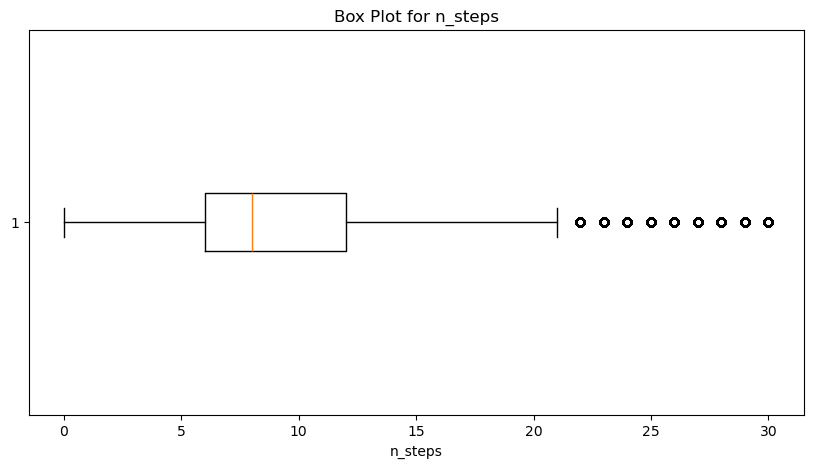

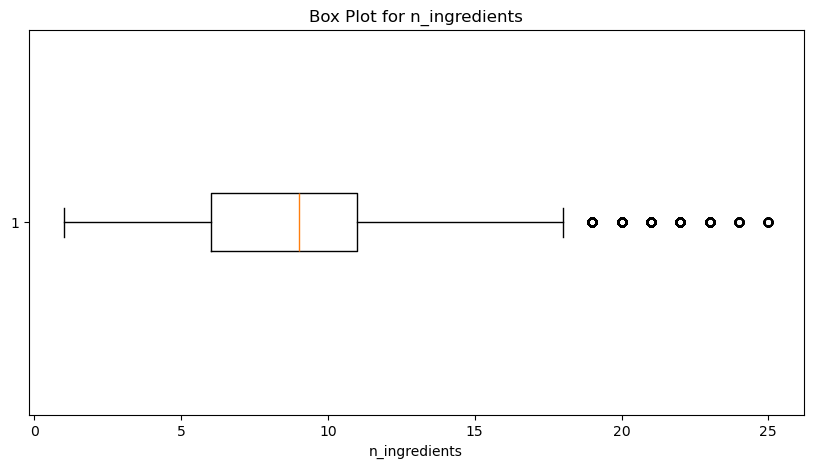

In [ ]:
# Trier les recettes par minutes, submitted, n_steps, n_ingredients en ordre décroissant
sorted_recipes = RAW_recipe.sort_values(
    by=["minutes", "submitted", "n_steps", "n_ingredients"],
    ascending=[False, False, False, False],
)

# Afficher un tableau avec les colonnes name, id, minutes, contributor_id, submitted, tags, steps, steps_count, n_steps, ingredients, ingredients_count, n_ingredients (10 lignes)
display(
    HTML(
        RAW_recipe[
            [
                "name",
                "id",
                "minutes",
                "contributor_id",
                "submitted",
                "tags",
                "nutrition",
                "description",
                "steps",
                "steps_count",
                "n_steps",
                "ingredients",
                "ingredients_count",
                "n_ingredients",
            ]
        ]
        .head(10)
        .to_html()
    )
)

# Nombre total de recettes avant suppression
total_recipes_count_before = RAW_recipe.shape[0]

# Compter les recettes dont la durée "minutes" est égale à 0 ou nulle
zero_or_null_minutes_count = RAW_recipe[
    RAW_recipe["minutes"].isnull() | (RAW_recipe["minutes"] == 0)
].shape[0]

# Compter les recettes dont la durée "minutes" est supérieure à 120 minutes
greater_than_120_minutes_count = RAW_recipe[RAW_recipe["minutes"] > 120].shape[0]

# Compter les recettes n'ayant pas de nom
no_name_count = RAW_recipe[
    RAW_recipe["name"].isnull() | (RAW_recipe["name"] == "")
].shape[0]

# Afficher les résultats avant suppression
print(f"Nombre total de recettes avant suppression : {total_recipes_count_before}")
print(
    f"Nombre de recettes dont la durée est égale à 0 ou nulle : {zero_or_null_minutes_count}"
)
print(
    f"Nombre de recettes dont la durée est supérieure à 120 minutes : {greater_than_120_minutes_count}"
)
print(f"Nombre de recettes n'ayant pas de nom : {no_name_count}")
print(
    f"Nombre de recettes dont n_steps est supérieur à 30 : {greater_than_30_steps_count}"
)
print(
    f"Nombre de recettes dont n_ingredients est supérieur à 25 : {greater_than_25_ingredients_count}"
)

# Supprimer les recettes dont la durée est égale à 0 ou nulle
RAW_recipe = RAW_recipe[
    ~(RAW_recipe["minutes"].isnull() | (RAW_recipe["minutes"] == 0))
]

# Supprimer les recettes dont la durée est supérieure à 120 minutes
RAW_recipe = RAW_recipe[RAW_recipe["minutes"] <= 120]

# Supprimer les recettes n'ayant pas de nom
RAW_recipe = RAW_recipe[~(RAW_recipe["name"].isnull() | (RAW_recipe["name"] == ""))]

# Supprimer les recettes dont n_steps est supérieur à 30
RAW_recipe = RAW_recipe[RAW_recipe["n_steps"] <= 30]

# Supprimer les recettes dont n_ingredients est supérieur à 25
RAW_recipe = RAW_recipe[RAW_recipe["n_ingredients"] <= 25]

# Nombre total de recettes après suppression
total_recipes_count_after = RAW_recipe.shape[0]

# Afficher les résultats après suppression
print(f"Nombre total de recettes après suppression : {total_recipes_count_after}")

# Tracer une boîte à moustaches pour n_steps
plt.figure(figsize=(10, 5))
plt.boxplot(RAW_recipe["n_steps"].dropna(), vert=False)
plt.title("Box Plot for n_steps")
plt.xlabel("n_steps")
plt.show()

# Tracer une boîte à moustaches pour n_ingredients
plt.figure(figsize=(10, 5))
plt.boxplot(RAW_recipe["n_ingredients"].dropna(), vert=False)
plt.title("Box Plot for n_ingredients")
plt.xlabel("n_ingredients")
plt.show()

# Développement du Notebook avec utilisation NLTK pour ce cas précis : Générer un nom de recette à partir des ingrédients et des techniques utilisées pour la réaliser

In [ ]:
# Fonction pour extraire les techniques de cuisine
def extract_cooking_techniques(steps):
    techniques = ["bake", "fry", "grill", "roast", "boil", "simmer", "steam", "sauté"]
    found_techniques = []
    tokens = word_tokenize(steps.lower())
    for technique in techniques:
        if technique in tokens:
            found_techniques.append(technique)
    return " ".join(found_techniques)


# Fonction pour générer un nom de recette
def generate_recipe_name(ingredients, steps):
    # Extraire les techniques
    techniques = extract_cooking_techniques(steps)

    # Sélectionner aléatoirement 2-3 ingrédients principaux
    ingredients_list = [
        lemmatizer.lemmatize(word)
        for word in word_tokenize(ingredients.lower())
        if word not in stop_words and word.isalpha()
    ]

    # Filtrer les verbes
    ingredients_list = [
        word
        for word, pos in pos_tag(ingredients_list)
        if pos not in ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
    ]

    main_ingredients = random.sample(ingredients_list, min(3, len(ingredients_list)))

    # Construire le nom
    name_parts = set()

    # Ajouter une technique si disponible
    if techniques:
        name_parts.add(random.choice(techniques.split()))

    # Ajouter les ingrédients
    name_parts.update(main_ingredients)

    return " ".join(name_parts).title()


# Appliquer la génération de noms sur le dataset
RAW_recipe["generated_name"] = RAW_recipe.apply(
    lambda x: generate_recipe_name(x["ingredients"], x["steps"]), axis=1
)

# Afficher les 5 premières lignes avec les colonnes spécifiées dans un format défilable
display(
    HTML(
        RAW_recipe[["name", "generated_name", "ingredients", "n_ingredients"]]
        .head()
        .to_html()
    )
)

# Sélectionner les colonnes spécifiées
transformed_dataset = RAW_recipe[
    ["name", "generated_name", "ingredients", "n_ingredients"]
]

# Sauvegarder le dataset transformé dans un fichier CSV
transformed_dataset.to_csv("transformed_recipes.csv", index=False)

,name,generated_name,ingredients,n_ingredients
0,arriba baked winter squash mexican style,Oil Spice Squash,"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,Crust Pepper Patty,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
3,alouette potatoes,Potato Pepper Bake Wine,"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']",11
6,aww marinated olives,Olive Chile,"['fennel seeds', 'green olives', 'ripe olives', 'garlic', 'peppercorn', 'orange rind', 'orange juice', 'red chile', 'extra virgin olive oil']",9
7,backyard style barbecued ribs,Sparerib Black Powder Boil,"['pork spareribs', 'soy sauce', 'fresh garlic', 'fresh ginger', 'chili powder', 'fresh coarse ground black pepper', 'salt', 'fresh cilantro leaves', 'tomato sauce', 'brown sugar', 'yellow onion', 'white vinegar', 'honey', 'a.1. original sauce', 'liquid smoke', 'cracked black pepper', 'cumin', 'dry mustard', 'cinnamon sticks', 'orange, juice of', 'mirin', 'water']",22


# Idée : se baser sur une autre base de données de recettes externes, et maximiser statistiquement la ressemblance entre les variables suivantes du dataset PostProcess RAW_recipes.csv : 

# - "name"
# - "ingrédients"
# - "minutes"
# - "n_ingredients"
# - "steps"

# --> UN SEUL DATASET PUBLIC TROUVE, PREPROCESS NECESSAIRE POUR REGROUPER LES INGREDIENTS, MAIS TITLE DISPO : GOOOOOOOOOOOOOOOOOOOOOOOOOOOO

Sit back - Bequem (à écouter)

In [15]:
# Download the external dataset
!kaggle datasets download -d hugodarwood/epirecipes 


# AUCUN DATASET DISPO ET PUBLIC AVEC COLONNES "INGREDIENTS" & "MINUTES"

Dataset URL: https://www.kaggle.com/datasets/hugodarwood/epirecipes
License(s): unknown
epirecipes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Définir le chemin vers votre fichier zip et où vous voulez l'extraire
zip_file_path = "epirecipes.zip"
output_directory = "./Dataset_unzipped"

# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print(
        f"Error: {zip_file_path} not found. Please ensure the file is downloaded correctly."
    )
else:
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Unzip the file
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(output_directory)

    print("Unzipping complete!")

# Configurer pandas pour afficher toutes les colonnes
pd.set_option("display.max_columns", None)

# Charger le dataset extrait
external_recipes = pd.read_csv(os.path.join(output_directory, "epi_r.csv"))

# Afficher les premières lignes du dataset au format HTML pour un meilleur affichage
display(HTML(external_recipes.head().to_html()))


# Function to count the number of recipes
def count_recipes(df):
    return len(df)


# Count the number of recipes
num_recipes = count_recipes(external_recipes)
print(f"Number of recipes: {num_recipes}")

Unzipping complete!


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

Number of recipes: 20052


# EDA & PreProcess du Dataset v2

In [ ]:
# Charger le dataset extrait
external_recipes = pd.read_csv(os.path.join(output_directory, "epi_r.csv"))

# Créer une nouvelle colonne pour les ingrédients
external_recipes["all_ingredients"] = ""

# Parcourir chaque ligne du dataframe
for index, row in external_recipes.iterrows():
    ingredients = []
    for col in external_recipes.columns:
        if row[col] == 1:
            ingredients.append(col)
    external_recipes.at[index, "all_ingredients"] = ", ".join(ingredients)

# Sélectionner les colonnes à afficher
columns_to_display = [
    "title",
    "all_ingredients",
    "rating",
    "calories",
    "protein",
    "fat",
    "sodium",
]

# Afficher les premières lignes du dataset au format HTML pour un meilleur affichage
display(HTML(external_recipes[columns_to_display].head().to_html()))

,title,all_ingredients,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap","apple, bean, cookie, fruit, kid-friendly, lentil, lettuce, sandwich, tomato, vegetable, turkey",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,"bake, bastille day, bon appétit, chill, dried fruit, food processor, new year's eve, onion, pork, port, winter",4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,"dairy, fennel, gourmet, new york, potato, soup/stew, vegetable",3.750,165.0,6.0,7.0,165.0
3,Mahi-Mahi in Tomato Olive Sauce,"bon appétit, dairy free, dinner, fish, healthy, high fiber, kosher, low cal, low fat, olive, peanut free, pescatarian, sauté, simmer, soy free, tomato, tree nut free",5.000,NaN,NaN,NaN,NaN
4,Spinach Noodle Casserole,"bake, bon appétit, california, cheese, dairy, fall, pasta, quick & easy, side, vegetable, vegetarian",3.125,547.0,20.0,32.0,452.0


# Peu de PreProcess réalisé : je fais tourner en local sur l'ensemble pour maximiser le % d'ingérdients similaires entre "RAW_recipes" & Dataset externe : "epirecipes"

# --> PUIS EXTRACT RANDOM 10 DANS LES DIFFERENTS CAS SELON : 
# 1) "transformed_recipes" = [RAW_recipes.csv avec preprocess + uniquement les colonnes  name/generated_name/ingrédients/n_ingredients]    -- (très lourd quand même ; pas utile pour streamlit)

# 2) "transformed_recipes_deployment" = "transformed_recipes" avec un random 10 dessus pour afficher au hasard 10 recettes avec des noms générés avec NLTK   -- (léger, à utiliser pour streamlit en tant qu'exemple de résultats)
# 3) "Second_method_comparison" = "transformed_erecipes" avec un random 10 avec condition : 60-100% d'ingrédients similaires entre transformed_recipes & le dataset externe "epi_r.csv" 

# --> Tableau final regroupant les colonnes "name (RAW)" / "ingrédients (RAW)" / generated_name_V1 (RAW) / generated_name (with epirecipes) / "% d'ingrédients similaires" / title (epirecipes) / "ingrédients (epirecipes)" -- (léger, à utiliser pour streamlit en tant qu'exemple de résultats)


GO | Sit back - Bequem en boucle



In [ ]:
# Lire le fichier CSV dans un DataFrame
transformed_recipes = pd.read_csv("transformed_recipes.csv")


# Fonction pour enregistrer un fichier CSV avec 10 recettes choisies aléatoirement
def save_random_recipes(df, filename, num_recipes=10):
    # Sélectionner aléatoirement 10 recettes pour un déploiement avec streamlit (csv peu volumineux & affichage propice)
    transformed_recipes_deployment = df.sample(n=num_recipes, random_state=1)
    # Enregistrer dans un fichier CSV
    transformed_recipes_deployment.to_csv(filename, index=False)
    return transformed_recipes_deployment


# Appeler la fonction pour enregistrer les recettes aléatoires
transformed_recipes_deployment = save_random_recipes(
    transformed_recipes, "transformed_recipes_deployment.csv"
)

# Afficher les premières lignes du dataset au format HTML pour un meilleur affichage
display(HTML(transformed_recipes_deployment.head().to_html(index=False)))
display(HTML(external_recipes[columns_to_display].head().to_html(index=False)))
display(HTML(transformed_recipes.head().to_html(index=False)))


# Fonction de prétraitement des ingrédients
def preprocess_ingredients(ingredients):
    tokens = word_tokenize(ingredients.lower())
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    return " ".join(tokens)


# Appliquer le prétraitement aux colonnes d'ingrédients AVEC FULL TRANSFORMED_RECIPES (pas uniquement 10 recettes)
transformed_recipes["processed_ingredients"] = transformed_recipes["ingredients"].apply(
    preprocess_ingredients
)
external_recipes["processed_ingredients"] = external_recipes["all_ingredients"].apply(
    preprocess_ingredients
)

# Vectoriser les caractéristiques combinées
vectorizer = TfidfVectorizer().fit_transform(
    transformed_recipes["processed_ingredients"].tolist()
    + external_recipes["processed_ingredients"].tolist()
)
vectors = vectorizer.toarray()

# Séparer les vecteurs des deux datasets
raw_vectors = vectors[: len(transformed_recipes)]
external_vectors = vectors[len(transformed_recipes) :]

# Calculer les similarités cosinus
similarities = cosine_similarity(raw_vectors, external_vectors)

# Trouver les noms de recettes les plus similaires
generated_names_v2 = []
similarity_percentages = []
external_titles = []
external_ingredients_list = []

for i, row in transformed_recipes.iterrows():
    best_match_index = similarities[i].argmax()
    best_similarity = similarities[i][best_match_index]

    if best_similarity >= 0.6:  # Seuil de 60%
        best_match = external_recipes.iloc[best_match_index]
        generated_names_v2.append(best_match["title"])
        similarity_percentages.append(best_similarity * 100)
        external_titles.append(best_match["title"])
        external_ingredients_list.append(best_match["all_ingredients"])
    else:
        generated_names_v2.append(None)
        similarity_percentages.append(0)
        external_titles.append(None)
        external_ingredients_list.append(None)

# Ajouter la nouvelle colonne au dataset FULL TRANSFORMED_RECIPES (pas uniquement 10 recettes)
transformed_recipes["generated_name_v2"] = generated_names_v2

# Créer le tableau bilan avec les colonnes dans l'ordre souhaité
bilan_df = pd.DataFrame(
    {
        "name (RAW)": transformed_recipes["name"],
        "ingredients (RAW)": transformed_recipes["ingredients"],
        "generated_name_V1 (RAW)": transformed_recipes["generated_name"],
        "generated_name (with epirecipes)": transformed_recipes["generated_name_v2"],
        "% d'ingrédients similaires": similarity_percentages,
        "title (epirecipes)": external_titles,
        "ingrédients (epirecipes)": external_ingredients_list,
    }
)

# Filtrer les recettes avec un % d'ingrédients similaires entre 60% et 100%
filtered_bilan_df = bilan_df[
    (bilan_df["% d'ingrédients similaires"] >= 60)
    & (bilan_df["% d'ingrédients similaires"] <= 100)
]

# Sélectionner aléatoirement 10 recettes parmi celles filtrées
random_bilan_df = filtered_bilan_df.sample(n=10, random_state=1)

# Afficher les 5 lignes aléatoires du tableau bilan
display(HTML(random_bilan_df.to_html(index=False)))

# Exporter les 10 lignes aléatoires dans un fichier CSV
random_bilan_df.to_csv("second_method_comparison_deployment.csv", index=False)

name,generated_name,ingredients,n_ingredients
couscous stuffed tomatoes,Basil Bell Cheese,"['tomatoes', 'couscous', 'fresh basil', 'cucumber', 'yellow bell pepper', 'parmesan cheese', 'chives']",7
roast beef and avocado finger sandwiches,Ground Black Roast Bread,"['california avocado', 'fresh lemon juice', 'fresh chives', 'kosher salt', 'fresh ground black pepper', 'white bread', 'mayonnaise', 'prepared horseradish', 'roast beef']",9
microwaved rolled rump roast,Sauce Salt Roast,"['rump roast', 'onion salt', 'browning sauce', 'water', 'bacon']",5
pineapple cream cheese icing,Cheese Confectioner Preserve,"['butter', 'cream cheese', 'pineapple preserves', ""confectioners' sugar""]",4
caribbean curried lamb,Oil Simmer Thyme Juice,"['olive oil', 'lamb', 'garlic cloves', 'scallions', 'curry powder', 'onions', 'fresh ginger', 'scotch bonnet pepper', 'allspice', 'fresh thyme', 'parsley', 'salt', 'pepper', 'lime juice', 'coconut cream', 'sweet basil', 'chicken stock', 'butter']",18


title,all_ingredients,rating,calories,protein,fat,sodium
"Lentil, Apple, and Turkey Wrap","apple, bean, cookie, fruit, kid-friendly, lentil, lettuce, sandwich, tomato, vegetable, turkey",2.500,426.0,30.0,7.0,559.0
Boudin Blanc Terrine with Red Onion Confit,"bake, bastille day, bon appétit, chill, dried fruit, food processor, new year's eve, onion, pork, port, winter",4.375,403.0,18.0,23.0,1439.0
Potato and Fennel Soup Hodge,"dairy, fennel, gourmet, new york, potato, soup/stew, vegetable",3.750,165.0,6.0,7.0,165.0
Mahi-Mahi in Tomato Olive Sauce,"bon appétit, dairy free, dinner, fish, healthy, high fiber, kosher, low cal, low fat, olive, peanut free, pescatarian, sauté, simmer, soy free, tomato, tree nut free",5.000,NaN,NaN,NaN,NaN
Spinach Noodle Casserole,"bake, bon appétit, california, cheese, dairy, fall, pasta, quick & easy, side, vegetable, vegetarian",3.125,547.0,20.0,32.0,452.0


name,generated_name,ingredients,n_ingredients
arriba baked winter squash mexican style,Oil Spice Squash,"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
a bit different breakfast pizza,Crust Pepper Patty,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
alouette potatoes,Potato Pepper Bake Wine,"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']",11
aww marinated olives,Olive Chile,"['fennel seeds', 'green olives', 'ripe olives', 'garlic', 'peppercorn', 'orange rind', 'orange juice', 'red chile', 'extra virgin olive oil']",9
backyard style barbecued ribs,Sparerib Black Powder Boil,"['pork spareribs', 'soy sauce', 'fresh garlic', 'fresh ginger', 'chili powder', 'fresh coarse ground black pepper', 'salt', 'fresh cilantro leaves', 'tomato sauce', 'brown sugar', 'yellow onion', 'white vinegar', 'honey', 'a.1. original sauce', 'liquid smoke', 'cracked black pepper', 'cumin', 'dry mustard', 'cinnamon sticks', 'orange, juice of', 'mirin', 'water']",22


name (RAW),ingredients (RAW),generated_name_V1 (RAW),generated_name (with epirecipes),% d'ingrédients similaires,title (epirecipes),ingrédients (epirecipes)
easy italian pasta casserole,"['spaghetti sauce', 'water', 'tomato sauce', 'penne', 'italian seasoning', 'garlic powder', 'ground oregano', 'mozzarella cheese']",Sauce Powder Bake Cheese,Basic Simple Syrup,61.978636,Basic Simple Syrup,sauce
no bake cookies made with chocolate chips,"['butter', 'milk', 'sugar', 'chocolate chips', 'peanut butter', 'oatmeal', 'vanilla']",Chip Butter Boil,Homemade Cultured Butter,66.495911,Homemade Cultured Butter,"butter, condiment/spread, milk/cream"
cocktail weiners,"['frankfurters', 'barbecue sauce', 'catsup', 'salt', 'garlic salt', 'pepper', 'tabasco sauce', 'onion', 'worcestershire sauce']",Sauce Salt Simmer,Basic Simple Syrup,91.964416,Basic Simple Syrup,sauce
parmesan garlic chicken strips,"['italian salad dressing mix', 'parmesan cheese', 'garlic powder', 'black pepper', 'chicken breasts']",Pepper Powder Mix,Vinaigrette,63.308598,Vinaigrette,"mustard, no-cook, salad dressing"
mom s mouth watering buffalo wings,"['flour', 'salt', 'cayenne pepper', 'paprika', 'hot sauce', 'margarine', 'white vinegar', 'celery seed', 'garlic salt', 'pepper', 'worcestershire sauce', 'tabasco sauce', 'chicken wings']",Sauce Pepper Fry,Basic Simple Syrup,66.178801,Basic Simple Syrup,sauce
circle sammiches,"['pepsi', 'white bread', 'bologna', 'mayonnaise', 'colby cheese', 'tomatoes']",Cheese Bread,Pizza Crust,88.120189,Pizza Crust,bread
chinese pork marinade,"['pork chops', 'hoisin sauce', 'garlic', 'oyster sauce', 'white pepper', 'salt', 'rice wine', 'five-spice powder']",Sauce Pepper Powder Grill,Basic Simple Syrup,60.817951,Basic Simple Syrup,sauce
not so universal dipping sauce iceland,"['mayonnaise', 'ketchup', 'pineapple juice', 'paprika', 'tabasco sauce', 'salt and pepper']",Sauce Pepper Juice,Basic Simple Syrup,63.547855,Basic Simple Syrup,sauce
kicked up sweet and sour sauce,"['sweet and sour sauce', 'chili sauce']",Sauce Sour,Basic Simple Syrup,72.363964,Basic Simple Syrup,sauce
rhubarb strawberry sauce,"['water', 'sugar', 'tapioca flour', 'salt', 'frozen rhubarb', 'frozen strawberries']",Flour Rhubarb Strawberry,Lattice-Topped Strawberry-Rhubarb Pie,64.277065,Lattice-Topped Strawberry-Rhubarb Pie,"bake, bon appétit, dessert, rhubarb, spring, strawberry"


# Crash volontaire - 96% du disque utilisé même après que la cell ait fini de run ?
# Dernière cellule run selon les capacités de l'ordi (32 Go RAM dans mon cas)
# --> NECESSAIRE DE CONNECTER BDD AU CLOUD POUR POUVOIR DEPLOYER AVEC STREAMLIT PROBABLEMENT

# OU GROS PREPROCESS DATASET RAW_RECIPES & DATASET EXTERNAL (epirecipes) : ON NE GARDE QUE LES RECETTES AVEC 60 - 100% DE SIMILARITES DANS LES INGREDIENTS ?? PERMET DE MINIMISER LA TAILLE DE LA BDD 